# MOVIE RECOMMENDER SYSTEM

## Loading the Dataset

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

movies = pd.read_csv(r'C:\\Users\\madhu\\OneDrive\\Desktop\\Edureka\\Certification Project\\movies.csv')
ratings = pd.read_csv(r'C:\\Users\\madhu\\OneDrive\\Desktop\\Edureka\\Certification Project\\ratings.csv')

merged = movies.merge(ratings, on='movieId')
merged.to_csv("output.csv", index=False)

merged.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,5.0,1350206819
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28,3.0,884098350
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,29,4.0,846942580
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4.5,1292690069
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,4.0,832397496


In [94]:
print('Shape of movies dataset  :', movies.shape)
print('Shape of ratings dataset :',ratings.shape)

Shape of movies dataset  : (10329, 3)
Shape of ratings dataset : (105339, 4)


## Understanding of distribution of the features available

In [65]:
print('Number of Users, who have given ratings is', merged.userId.nunique())
print('Number of total movies being rated is',merged.title.nunique())
print('Total number of genres of the rated movies is',merged.genres.nunique())

Number of Users, who have given ratings is 668
Number of total movies being rated is 10323
Total number of genres of the rated movies is 938


### Summary Statistics for the Rating feature

In [61]:
print(pd.DataFrame(merged.rating.describe()))

              rating
count  105339.000000
mean        3.516850
std         1.044872
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000


### Distribution Plots for the Features

<AxesSubplot:ylabel='Count'>

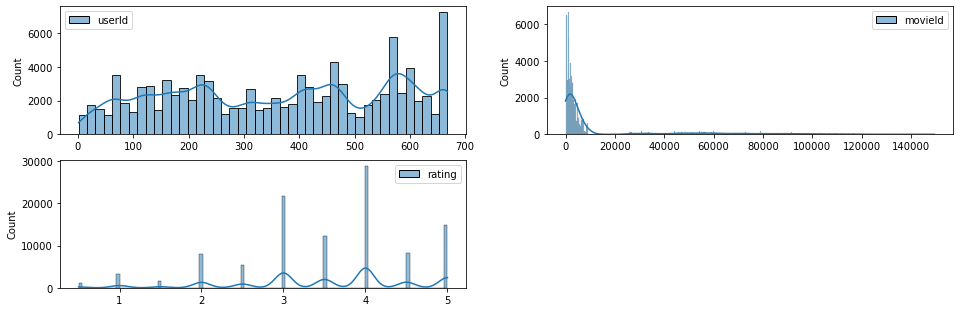

In [3]:
plt.figure(figsize=(16,8))
plt.subplot(3,2,1)
sns.histplot(merged[['userId']],kde=True)
plt.subplot(3,2,2)
sns.histplot(merged[['movieId']],kde=True)
plt.subplot(3,2,3)
sns.histplot(merged[['rating']],kde=True)

### Count Plots for Categorical Variables

#### Movies 

<AxesSubplot:xlabel='title', ylabel='count'>

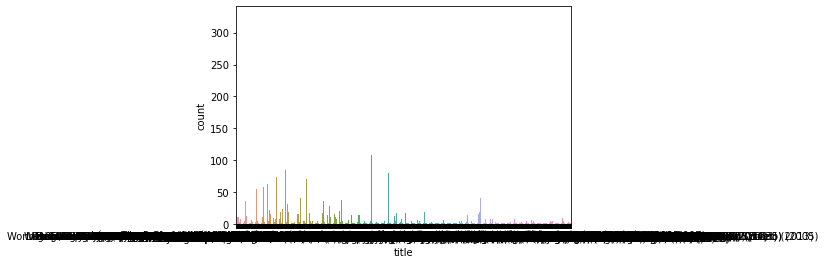

In [4]:
sns.countplot(merged.title)

#### Genres

<AxesSubplot:xlabel='genres', ylabel='count'>

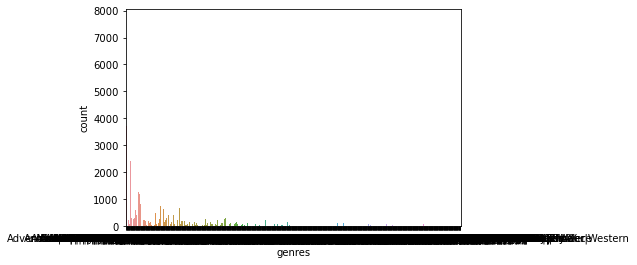

In [5]:
sns.countplot(merged.genres)

### Box Whisker Plot for  'rating'

There are 2 outliers towards 0


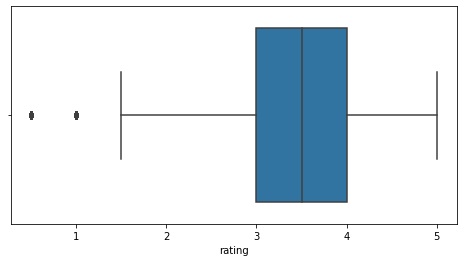

In [48]:
plt.figure(figsize=(8,4))
sns.boxplot(merged['rating'])
print('There are 2 outliers towards 0')

## Average Rating and Total Movies at Genre Level

In [77]:
print('Average rating for different Genres')
Genres_Rating = merged.groupby('genres')['rating'].mean()
pd.DataFrame(Genres_Rating) 

Average rating for different Genres


,rating
genres,
(no genres listed),3.071429
Action,2.836406
Action|Adventure,3.739804
Action|Adventure|Animation,4.125000
Action|Adventure|Animation|Children,3.550000
...,...
Sci-Fi|Thriller|IMAX,3.500000
Thriller,3.473430
Thriller|War,3.500000


In [79]:
print('Total Number of Movies for different Genres')
Genres_Movies = merged.groupby('genres')['movieId'].count()
pd.DataFrame(Genres_Movies) 

Total Number of Movies for different Genres


,movieId
genres,
(no genres listed),7
Action,217
Action|Adventure,613
Action|Adventure|Animation,12
Action|Adventure|Animation|Children,10
...,...
Sci-Fi|Thriller|IMAX,6
Thriller,828
Thriller|War,7


## Finding Unique Users and Movies

In [2]:
#Unique movie names

Movies = np.array(merged.title.unique())
pd.DataFrame(Movies)

,0
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)
...,...
10318,Cosmic Scrat-tastrophe (2015)
10319,Le Grand Restaurant (1966)
10320,A Very Murray Christmas (2015)
10321,The Big Short (2015)


In [6]:
#Unique User IDs

UserId = np.array(merged.userId.unique())
UserId.sort()
UserId

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Unique Genres Considered

In [36]:
Genres = np.array(merged.genres.unique())
Genres

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

# RECOMMENDATION MODULES BASED ON OBJECTIVES

# OBJECTIVE 1
    Create a popularity-basedrecommender system at a genre level. The userwill input a genre (g), minimum ratingthreshold (t) for a movie,and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews

In [57]:
def recommendation(g, t, N):
    Genre_Choosen = movies[movies.genres == g ]
    mean_ratings = pd.DataFrame(merged.groupby('title')['rating'].mean().sort_values(ascending=False))
    mean_ratings.columns =['avg_rating']
    num_of_ratings = pd.DataFrame(merged.groupby('title')['rating'].count().sort_values(ascending=False))
    num_of_ratings.columns =['num_reviews']
    Average_ratings = mean_ratings[mean_ratings.index.isin(Genre_Choosen.title)].reset_index() 
    Num_reviews = num_of_ratings[num_of_ratings.index.isin(Genre_Choosen.title)].reset_index() 
    recommendation = pd.merge(Average_ratings, Num_reviews, on='title')
    final_recoms = recommendation[recommendation['num_reviews'] > t].reset_index().head(N)
    final_recoms = final_recoms[final_recoms.columns[1:4]]
    
    
    return final_recoms

In [58]:
g = str(input('Genre : '))
t = int(input('Minimum rating threshold : '))
N = int(input('No. of recommendations : '))

recommendation(g, t, N)

Genre : Drama
Minimum rating threshold : 30
No. of recommendations : 10


,title,avg_rating,num_reviews
0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.459459,37
1,One Flew Over the Cuckoo's Nest (1975),4.272727,143
2,To Kill a Mockingbird (1962),4.200000,70
3,12 Angry Men (1957),4.182540,63
4,"Streetcar Named Desire, A (1951)",4.171875,32
5,Gandhi (1982),4.093750,48
6,Requiem for a Dream (2000),4.092308,65
7,Amadeus (1984),4.087629,97
8,Cool Hand Luke (1967),4.063492,63
9,"Elephant Man, The (1980)",4.032258,31


### GUI facilitated recommendation

In [59]:
g = widgets.Text(description = 'Genre')
t = widgets.IntText(description = 'Minimum rating threshold')
N = widgets.IntText(description = 'No. of recommendations')
button = widgets.Button(description = 'Recommended Movies')

Inputs = widgets.VBox([g,t,N])
Interface = widgets.HBox([Inputs,button])

In [63]:
def on_button_clicked(b):
    print(recommendation(g = g.value,t = t.value, N = N.value))

button.on_click(on_button_clicked)

In [64]:
Interface

                                               title  avg_rating  num_reviews
0  Monty Python's And Now for Something Completel...    4.044118           34
1                                      Clerks (1994)    3.980198          101
2                          This Is Spinal Tap (1984)    3.964789           71
3                    Ferris Bueller's Day Off (1986)    3.960938          128
4          Monty Python's The Meaning of Life (1983)    3.923913           46
5                                Animal House (1978)    3.898438           64
6  Borat: Cultural Learnings of America for Make ...    3.875000           40
7                                    Election (1999)    3.873016           63
8                              Producers, The (1968)    3.857143           35
9                             Raising Arizona (1987)    3.846154           78


# OBJECTIVE 2
    
    Create a content-based recommender system thatrecommends top N movies based on similar movie(m) genres

In [55]:
def recommendation_genre(t, N):
    Genre = pd.DataFrame(movies.loc[movies['title'] == t, 'genres']) 
    Genre = Genre.iloc[0,0]
    Genre_Choosen = movies[ movies.genres == Genre ]
    mean_ratings = pd.DataFrame(merged.groupby('title')['rating'].mean().sort_values(ascending=False))
    mean_ratings.columns =['avg_rating']
    Recommendations = mean_ratings[mean_ratings.index.isin(Genre_Choosen.title)].reset_index().head(N)
    Recommendations
    
    
    return Recommendations

In [12]:
t = str(input('movie_name : '))
N = int(input('No of recommendations : '))


recommendation_genre(t, N)

movie_name : Alice (2009)
No of recommendations : 10


,title,avg_rating
0,Alice (2009),4.250000
1,Jason and the Argonauts (1963),4.166667
2,"Sword and the Sorcerer, The (1982)",4.000000
3,Willow (1988),3.922222
4,"Last Airbender, The (2010)",3.750000
5,"7th Voyage of Sinbad, The (1958)",3.750000
6,Indiana Jones and the Temple of Doom (1984),3.743119
7,47 Ronin (2013),3.666667
8,Highlander (1986),3.652542
9,"Thief of Bagdad, The (1924)",3.500000


### GUI facilitated recommendation

In [71]:
t = widgets.Text(description = 'Movie Name')
N = widgets.IntText(description = 'No. of recommendations')
button = widgets.Button(description = 'Recommended Movies')

Inputs = widgets.VBox([t,N])
Interface_2 = widgets.HBox([Inputs,button])

In [72]:
def on_button_clicked(b):
    print(recommendation_genre(t = t.value, N = N.value))

button.on_click(on_button_clicked)

In [73]:
Interface_2

                                         title  avg_rating
0                                 Alice (2009)    4.250000
1               Jason and the Argonauts (1963)    4.166667
2           Sword and the Sorcerer, The (1982)    4.000000
3                                Willow (1988)    3.922222
4                   Last Airbender, The (2010)    3.750000
5             7th Voyage of Sinbad, The (1958)    3.750000
6  Indiana Jones and the Temple of Doom (1984)    3.743119
7                              47 Ronin (2013)    3.666667
8                            Highlander (1986)    3.652542
9                  Thief of Bagdad, The (1924)    3.500000


# OBJECTIVE 3
    
    Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u”

In [74]:
# getting famous movies

vc = ratings.movieId.value_counts()
popular = vc[vc > 50].index

In [75]:
# getting prolific users

vc = ratings.userId.value_counts()
prolofic_users = vc[vc > 200].index

In [76]:
# matrix for movies and users

final_ratings = ratings[ratings.userId.isin(prolofic_users) & ratings.movieId.isin(popular)]
ratings_matrix = final_ratings.pivot_table(index = 'userId',
                          columns = 'movieId',
                          values = 'rating',
                          aggfunc = 'mean',
                          fill_value = 0)
ratings_matrix

movieId,1,2,3,5,6,7,10,11,16,17,...,59315,60069,63082,68157,68358,68954,69122,70286,72998,79132
userId,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,4.0,4.0,0.0,0.0,4.0,2.0,4.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,4.0,3.0,4.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,3.5,3.0,0.0,4.5,5.0,2.5,0.0,3.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,5.0,4.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,0.0,0.0,0.0,0.0,2.5,3.5,0.0,0.0,3.0,0.0,...,3.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# defining function for similar users for the target user

def similar_users(user_id, num_sim_users):
    user_of_choice = ratings_matrix[ratings_matrix.index == user_id]
    others = ratings_matrix[ratings_matrix.index != user_id]
    similarity_ser = pd.Series(cosine_similarity(user_of_choice, others).flatten(), index = others.index)
    top_similar = similarity_ser.sort_values(ascending = False)[:num_sim_users].index
    return top_similar

In [78]:
# defining function for recommended movies based on similar users 


def recommendation_sim_users(u, k, N):
    similar_user_data = ratings_matrix[ratings_matrix.index.isin(similar_users(u, k))]
    df_sim_user = pd.DataFrame(similar_user_data.apply(lambda x : x[x>0].mean()), columns = ['mean_ratings']).reset_index()
    user_of_choice = ratings_matrix.loc[ratings_matrix.index == u,]
    user_data = pd.DataFrame(user_of_choice.T.values , columns = ['ratings'], index = user_of_choice.columns)
    top_10 = user_data.sort_values( 'ratings', ascending= False)[:10].reset_index()
    
    # top 10 favourite movies of the user 
    top_10_favs = pd.merge(movies,top_10, how = 'inner' ).sort_values('ratings', ascending=False, ignore_index=True)
    unseen_movies = user_data[user_data.ratings == 0].index
    sorted_unseen = df_sim_user[df_sim_user.movieId.isin(unseen_movies)].sort_values('mean_ratings', ascending=False)[:N]

    # recommended movies based on similar users 
    recos = pd.merge(movies, sorted_unseen)

    return recos

In [22]:
u = int(input('User ID of the target user : '))
k = int(input('Number of similar users : '))
N = int(input('No. of recommendations needed : '))

recommendation(u, k, N)

User ID of the target user : 24
Number of similar users : 10
No. of recommendations needed : 10


,movieId,title,genres,mean_ratings
0,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,5.00
1,266,Legends of the Fall (1994),Drama|Romance|War|Western,5.00
2,337,What's Eating Gilbert Grape (1993),Drama,5.00
3,852,Tin Cup (1996),Comedy|Drama|Romance,5.00
4,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.80
5,1358,Sling Blade (1996),Drama,4.75
6,1396,Sneakers (1992),Action|Comedy|Crime|Drama|Sci-Fi,5.00
7,2353,Enemy of the State (1998),Action|Thriller,5.00
8,3481,High Fidelity (2000),Comedy|Drama|Romance,5.00
9,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,5.00


### GUI facilitated recommendation

In [87]:
u = widgets.IntText(description = 'UserID')
k = widgets.IntText(description = 'No. of similar users')
N = widgets.IntText(description = 'No. of recommendations')
button = widgets.Button(description = 'Recommended Movies')

Inputs = widgets.VBox([u,k,N])
Interface_3 = widgets.HBox([Inputs,button])

In [88]:
def on_button_clicked(b):
    print(recommendation_sim_users(u = u.value, k = k.value, N = N.value))

button.on_click(on_button_clicked)

In [89]:
Interface_3

   movieId                                   title  \
0       48                       Pocahontas (1995)   
1      266              Legends of the Fall (1994)   
2      337      What's Eating Gilbert Grape (1993)   
3      852                          Tin Cup (1996)   
4     1193  One Flew Over the Cuckoo's Nest (1975)   
5     1358                      Sling Blade (1996)   
6     1396                         Sneakers (1992)   
7     2353               Enemy of the State (1998)   
8     3481                    High Fidelity (2000)   
9     4306                            Shrek (2001)   

                                              genres  mean_ratings  
0           Animation|Children|Drama|Musical|Romance          5.00  
1                          Drama|Romance|War|Western          5.00  
2                                              Drama          5.00  
3                               Comedy|Drama|Romance          5.00  
4                                              Drama        